In [57]:
train_file_path=  r"C:\Users\pc\Desktop\Machine Learning\Housing-Prediction\housing\artifact\data_ingestion\2022-08-22-23-54-34\ingested_data\train\housing.csv"


In [58]:
import pandas as pd

In [59]:
df = pd.read_csv(train_file_path)

In [60]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [61]:
df.shape

(16512, 10)

In [62]:
x,y= df.drop(columns=["median_house_value"],axis=1),df[["median_house_value"]]

In [63]:
x.shape


(16512, 9)

In [64]:
y.shape

(16512, 1)

In [65]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
numerical_column = x.drop(columns=['ocean_proximity'],axis=1)


In [68]:

numerical_column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [69]:
simple_imputer = SimpleImputer(strategy="median")


In [70]:
simple_imputer.fit_transform(numerical_column)


array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [71]:
df = simple_imputer.transform(numerical_column)

In [72]:
simple_imputer.feature_names_in_


array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [73]:
simple_imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [74]:
simple_imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [75]:
x.latitude.median()

34.26

In [76]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [77]:
simple_imputer = SimpleImputer(strategy="most_frequent")

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin


In [79]:
class Test(BaseEstimator,TransformerMixin):
    
    def __init__(self,strategy="median"):
        self.strategy=strategy

    def fit(self,X):
        self.features_=X.columns
        self.statistic_=[]
        for column in X.columns:
            self.statistic_.append(X[column].median())
        return self


    def transform(self,X:pd.DataFrame):
        for idx,column in enumerate(x.columns):
            X[column].fillna(self.statistic_[idx]) 
        return X


In [80]:
response =Test().fit(numerical_column)

In [81]:
response.statistic_

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

In [82]:
for idx,column in enumerate(x.columns):
    print(idx,column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [83]:
import numpy as np

In [84]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [85]:
50/25

2.0

In [86]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [87]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [88]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e

In [89]:
arr1=np.arange(10)
arr2=np.arange(10)

In [90]:
np.c_[arr1,arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ('feature_genrator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
cat_pipeline = Pipeline(steps=[
     ('imputer',SimpleImputer(strategy="most_frequent")),
      ('oneHotEncoder',OneHotEncoder()),
       ('scaling',StandardScaler(with_mean=False))
])

In [96]:
df=  pd.read_csv(train_file_path)

In [97]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [98]:
num_column_name=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        ]

cat_column_name=['ocean_proximity']

In [99]:
preprocessing  =ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)]
)

In [100]:
train_df=preprocessing.fit_transform(df)

In [101]:
test_file_path=r"C:\Users\pc\Desktop\Machine Learning\Housing-Prediction\housing\artifact\data_ingestion\2022-08-23-00-00-00\ingested_data\test\housing.csv"


In [102]:
test_df = pd.read_csv(test_file_path)

In [103]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [104]:
preprocessing.transform(test_df)


array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [105]:
import dill


In [106]:
with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing,prep_file)

In [107]:
with open('preprocessing.pkl', "rb") as file_obj:
    preprocessing_loaded_obj= dill.load(file_obj)

In [125]:
test_arr=preprocessing_loaded_obj.transform(test_df)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
x=train_df

In [112]:
x.shape

(16512, 16)

In [113]:
y=np.array(df.median_house_value)


In [114]:
lr = LinearRegression()

In [115]:
lr.fit(x,y)

LinearRegression()

In [116]:
lr.fit_intercept

True

In [117]:
lr.coef_

array([-5.56496176e+04, -5.67116600e+04,  1.37347134e+04, -1.94306475e+03,
        7.34322644e+03, -4.57092717e+04,  4.54532707e+04,  7.47141454e+04,
        6.60457835e+03,  1.04305163e+03,  9.24830442e+03,  3.19499614e+13,
        2.99866108e+13,  7.08213557e+11,  2.02838403e+13,  2.15453310e+13])

In [118]:
lr.intercept_

-64353975205473.266

In [119]:
y_hat=  lr.predict(x)


In [120]:
import matplotlib.pyplot as plt

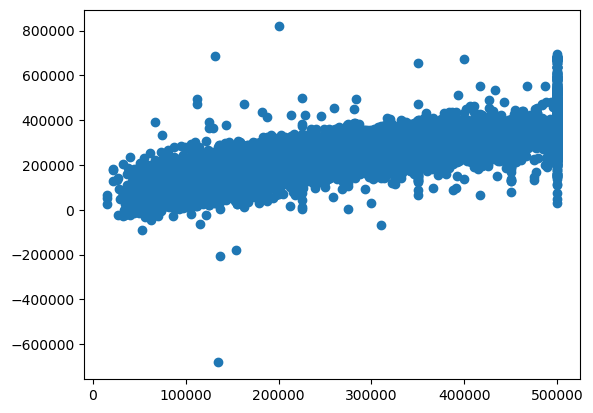

In [121]:
plt.plot(y,y_hat,"o")

In [122]:
from sklearn.metrics import r2_score

In [123]:
r2_score(y,y_hat)

0.6481553610396557

In [126]:
yhat_test = lr.predict(test_arr)

In [127]:
y_test = np.array(test_df.median_house_value)

In [128]:
r2_score(y_test,yhat_test)


0.6564594449370611